### 线性回归算法


我们先准备一下全局的数据，以及划分一下数据集 ratio=0.8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

lines=np.loadtxt('USA_Housing.csv',delimiter=',',dtype='str')
header=lines[0]
lines=lines[1:].astype(float)

print('数据特征:',','.join(header[:-1]))
print('数据标签: ',header[-1])
print('数据总条数:',len(lines))


#划分训练集
ratio=0.8
split=int(ratio*len(lines))
np.random.seed(0)

lines=np.random.permutation(lines)

train,test=lines[:split],lines[split:]
#数据归一化
scaler=StandardScaler()   #将参数进行标准化
scaler.fit(train)  
train=scaler.transform(train)   #transform方法的作用是根据之前计算好的均值和标准差，对数据进行标准化。
test=scaler.transform(test)

x_train,y_train=train[:,:-1],train[:,-1].flatten()
x_test,y_test=test[:,:-1],test[:,-1].flatten()


数据特征: Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
数据标签:  Price
数据总条数: 5000


#### 线性回归解析方法推导

在线性回归中，我们希望找到一个线性模型 $ y = X\theta + \epsilon $，其中：
- $ y $ 是目标变量（列向量，大小为 $ N \times 1 $）。
- $ X $ 是特征矩阵（大小为 $ N \times (p+1) $，包括偏置项）。
- $ \theta $ 是待求解的参数向量（大小为 $ (p+1) \times 1 $）。
- $ \epsilon $ 是误差项（列向量，大小为 $ N \times 1 $）。

我们的目标是最小化损失函数 $ J(\theta) $，即均方误差（MSE）的一半：

$$
J(\theta) = \frac{1}{2N} \|y - X\theta\|^2 = \frac{1}{2N} (y - X\theta)^T(y - X\theta)
$$

接下来，我们通过解析方法求解最优参数 $ \theta $。

---

### 推导步骤

#### 1. 展开损失函数

首先展开 $ J(\theta) $ 的表达式：

$$
J(\theta) = \frac{1}{2N} (y - X\theta)^T(y - X\theta)
$$

利用矩阵转置和乘法的性质，展开括号：

$$
J(\theta) = \frac{1}{2N} \left( y^Ty - y^TX\theta - \theta^TX^Ty + \theta^TX^TX\theta \right)
$$

注意到 $ y^TX\theta $ 和 $ \theta^TX^Ty $ 是标量，并且满足 $ y^TX\theta = \theta^TX^Ty $，因此可以合并为：

$$
J(\theta) = \frac{1}{2N} \left( y^Ty - 2\theta^TX^Ty + \theta^TX^TX\theta \right)
$$

---

#### 2. 对 $ \theta $ 求导

为了找到使 $ J(\theta) $ 为最小值的 $ \theta $，我们对 $ J(\theta) $ 关于 $ \theta $ 求导，并令导数为零。



对 $ J(\theta) $ 求导：

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{2N} \left( -2X^Ty + 2X^TX\theta \right)
$$

化简后得到：

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{N} \left( -X^Ty + X^TX\theta \right)
$$

令导数为零：

$$
\frac{1}{N} \left( -X^Ty + X^TX\theta \right) = 0
$$

---

#### 3. 解方程求 $ \theta $

将方程整理为：

$$
X^TX\theta = X^Ty
$$

假设 $ X^TX $ 是可逆的（即 $ X $ 的列是线性无关的），则两边同时左乘 $ (X^TX)^{-1} $：

$$
\theta = (X^TX)^{-1}X^Ty
$$

这就是线性回归的解析解。

---

### 总结

通过最小化损失函数 $ J(\theta) $，我们得到了线性回归的最优参数解析解：

$$
\boxed{\theta = (X^TX)^{-1}X^Ty}
$$

这个公式可以直接用于计算线性回归模型的参数，无需迭代优化。

In [1]:
#在x矩阵最后添加一列1，代表常数项
X=np.concatenate([x_train,np.ones((len(x_train),1))],axis=1)
# @表示矩阵相乘，X.T表示转置  np.linalg.inv表示矩阵的逆

theta=np.linalg.inv(X.T @ X) @ X.T @ y_train
print('回归系数: ',theta)

#在测试集上使用回归系数进行预测
X_test=np.concatenate([x_test,np.ones((len(x_test),1))],axis=1)
y_pred=X_test@theta
#计算预测值和真实值之间的RMSE
rmse_loss=np.sqrt(np.square(y_test-y_pred).mean())
print('RMSE: ',rmse_loss)


NameError: name 'np' is not defined

我们再来试试用sklearn的线性回归模型

通过fit训练数据

coef_得到回归系数 intercept_得到常数项

In [ ]:
#导入包
from sklearn.linear_model import LinearRegression

#初始化模型
linreg=LinearRegression()
linreg.fit(x_train,y_train)

#coef_ 是得到的回归系数 intercept_是常数项
print('回归系数:',linreg.coef_,linreg.intercept_)
y_pred=linreg.predict(x_test)

rmse_loss=np.sqrt(np.square(y_pred-y_test).mean())
print('RMSE: ',rmse_loss)


回归系数: [0.65088125 0.46722283 0.3384662  0.00617276 0.42685709] -1.4635041882766192e-14
RMSE:  0.28791834247503534


### 梯度下降算法
  - GD(gradient decent)
    - 稳定
    - 数据量比较庞大，时间复杂度高
  - SGD(stochastic gradient decent)
    - 该算法只计算一个样本，不稳定性极高
  - MBGD(mini-batch gradient decent)
    - 采用小批量的数据,时间复杂度低

以下我们实现MBGD算法，但是现代深度学习领域SGD已经成为MBGD的代名词，因此本文不再区分这两个算法，统称为SGD


In [ ]:
# bactch 每一次都返回大小为batc_size的批量
# shuffle 代表是否需要随机打乱数据
def batch_generator(x,y,batch_size,shuffle=True):
  batch_count=0
  #打乱数据
  if(shuffle):  
    #随机生成 [0,len(x))的下标
    idx=np.random.permutation(len(x))     
    x=x[idx]
    y=y[idx]
  while(True):
    start=batch_count*batch_size
    end=min(start+batch_size,len(x))
    if(start>=end):
      break
    batch_count+=1
    yield x[start:end],y[start:end]  #缓存每一个批量的数据

这里面需要注意的一个关键字就是   `yield`
他就是将这个数据缓存，每一次调用这个函数的时候，他就会返回一次结果，  
如果返回的次数多余缓存的次数就会报错。

以下我举个例子

In [ ]:
def count_up_to(max_value):
    current = 1
    while current <= max_value:
        yield current
        current += 1

# 遍历生成器
for number in count_up_to(5):
    print(number)


1
2
3
4
5


In [ ]:
def simple_generator():
    yield 1
    yield 2
    yield 3

# 创建生成器对象
gen = simple_generator()

# 使用 next() 获取值
print(next(gen))  
print(next(gen))  
print(next(gen))  
# 再次调用 next() 会抛出 StopIteration 异常
# print(next(gen))  # 抛出 StopIteration

1
2
3


好的，介绍完关键词 `yield`

我们继续SGD的算法

回归系数： [ 0.65357756  0.46682964  0.33885411  0.00720843  0.42751035 -0.00273407]


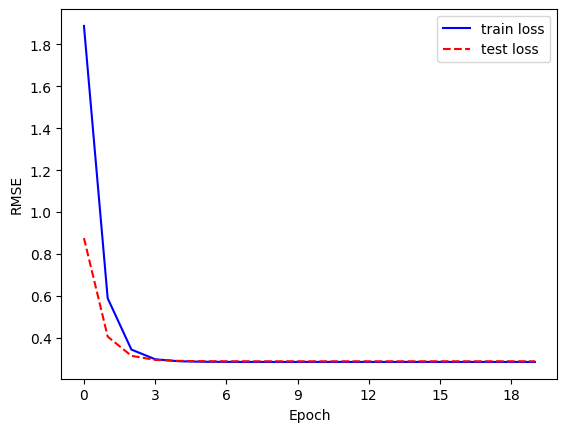

In [ ]:
#三个参数分别为迭代次数 学习率 批量数
def SGD(num_epoch,learning_rate,batch_size):
  #对于所有训练参数的行末尾加一个1 来代表 ax1+bx2+-----+c 中的常数
  X=np.concatenate([x_train,np.ones((len(x_train),1))],axis=-1)
  X_test=np.concatenate([x_test,np.ones((len(x_test),1))],axis=-1)
  #采用正态分布来获取一个随机的，长度为变量数的系数
  theta=np.random.normal(size=X.shape[1])
  #储存每一次的迭代后的损失值
  train_losses=[]
  test_losses=[]
  #进行迭代
  for i in range(num_epoch):
    batch_g=batch_generator(X,y_train,batch_size)
    train_loss=0
    for x_batch,y_batch in batch_g:
      #梯度
      grad=x_batch.T @ (x_batch @ theta -y_batch)
      #梯度下降
      theta=theta-learning_rate*grad/len(x_batch)
      train_loss+=np.square(x_batch @ theta -y_batch).sum()
    train_loss=np.sqrt(train_loss/len(X))
    train_losses.append(train_loss)
    test_lose=np.sqrt(np.square(X_test@theta-y_test).mean())
    test_losses.append(test_lose)
  print('回归系数：', theta)
  return theta, train_losses, test_losses


#设置SGD参数
num_epoch=20
learning_rate=0.01
batch_size=32
#设置随机种子
np.random.seed(0)
# _表示占位符 表示忽视第一个返回值
_, train_losses, test_losses = SGD(num_epoch, learning_rate, batch_size)
#画图
plt.plot(np.arange(num_epoch), train_losses, color='blue', 
    label='train loss')
plt.plot(np.arange(num_epoch), test_losses, color='red', 
    ls='--', label='test loss')
#将x坐标设置为整数
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()



好了，看过了代码，接下来我们来解析以下算法思想

首先我们知道线性回归的损失函数为均方误差（MSE）：
$$
L(\theta) = \frac{1}{2N} \sum_{i=1}^N \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
$$
对于损失函数 $\theta$ 求偏导，然后我们得到梯度公式:
$$
\nabla_\theta L(\theta) = \frac{1}{N} X^T \cdot \left( X \cdot \theta - y \right)
$$
然后我们可以得到递归公式：
$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \cdot \nabla_\theta L(\theta^{(t)})
$$
那么我们就可以通过每一次的小批量的train数据来不断精确 变量参数  $\theta$ 


将损失函数关于运行次数的关系制图,我们可以看到损失函数先一直保持下降，之后趋于平稳

#### 然后我们来了解两个画图的函数
- `plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))`
  - `plt.gca()` 表示获取当前的坐标轴对象（Axes）
  - `.xaxis` 表示当前坐标轴的 x 轴对象
  - `.set_major_locator(...)` 用来设置主刻度（major ticks）的位置的方法
  - `MaxNLocator(integer=True)` Matplotlib 中的一个刻度定位器类，用于自动选择刻度位置
    - 参数 `integer=True`  表示只允许刻度值为整数

  这行代码的整体功能是：
  - 获取当前图表的坐标轴对象。
  - 设置 x 轴的主刻度定位器为 MaxNLocator，并要求刻度值必须是整数。
  - 最终效果是：x 轴上的刻度值只会显示整数，而不会出现小数。


- `plt.legend()`:它的作用是为图表中的不同曲线或数据系列标注标签，从而帮助读者理解每条曲线或数据的含义。


接下来，我们来看下不同学习率对RMSE的影响和回归的效果

回归系数： [0.64542258 0.47047873 0.33188398 0.00325404 0.42479699 0.00237965]
回归系数： [0.59247915 0.58561574 0.26554358 0.10173112 0.49435997 0.13108641]
回归系数： [0.63982779 0.41128521 0.36069564 0.00889609 0.38672539 0.03655624]


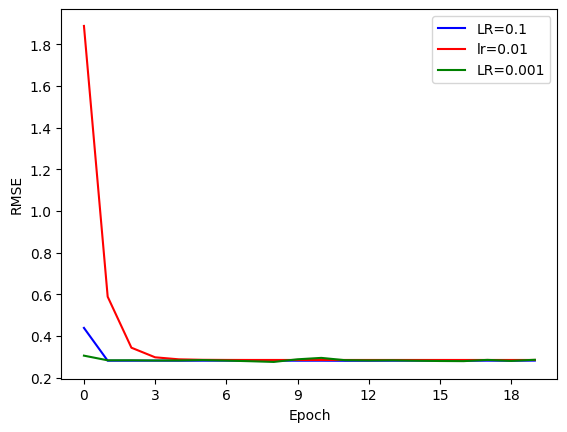

In [ ]:
_, lose1, _=SGD(num_epoch=num_epoch,learning_rate=0.1,batch_size=batch_size)
_, lose2, _=SGD(num_epoch=num_epoch,learning_rate=0.001,batch_size=batch_size)
_, lose2, _=SGD(num_epoch=num_epoch,learning_rate=1,batch_size=batch_size)

plt.plot(np.arange(num_epoch),lose1,color='blue',label='LR=0.1')
plt.plot(np.arange(num_epoch), train_losses, color='red', label='lr=0.01')
plt.plot(np.arange(num_epoch),lose2,color='green',label='LR=0.001')

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()



可以看到，随着学习率的增大，算法的收敛效果明显加快

那么，学习率不是越大越好？我们将学习率继续上调到1.5，来看看结果

回归系数： [ 5.77637606e+79 -4.83668911e+80  3.25996549e+80  4.23825401e+80
  4.71711285e+80  2.86687587e+78]
最终损失： 5.561487004224334e+80


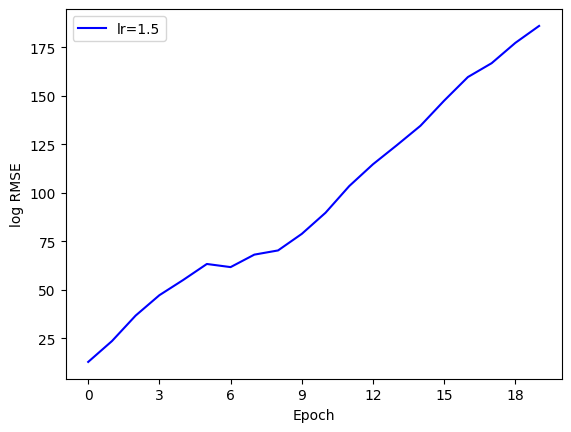

In [ ]:
_, loss3, _ = SGD(num_epoch=num_epoch, learning_rate=1.5, batch_size=batch_size)
print('最终损失：', loss3[-1])
plt.plot(np.arange(num_epoch), np.log(loss3), color='blue', label='lr=1.5')
plt.xlabel('Epoch')
plt.ylabel('log RMSE')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

我们可以看到，算法的RMSE在迭代过程中不但没有减小，反而发散了

所以选择一个合适的学习率是算法的重中之重

 ### 总结
Liner Regression 常用的两个算法 （1）解析方法 （2）梯度下降

前者能够得到精确的解，但是计算的时空开销大,
   
后者通过数值近似的方法，用较小的时空复杂度得到了与精确解接近的结果，但是常常需要手动调整学习率和迭代次数，


   梯度下降更为常用，他衍生除了很多更有效，更快速的优化方法，是现代深度学习的基础之一